### Importing Essential Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [20]:
mal = pd.read_csv('Obfuscated-MalMem2022.csv') #loading dataset

In [21]:
mal.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [22]:
mal.shape #counting rows and columns

(58596, 57)

 ## -------------------Data Wrangling------------------

#### 1. Dealing with missing Values

In [23]:
mal.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

0 represents no missing values

#### Missing values checking through heatmap

<AxesSubplot:>

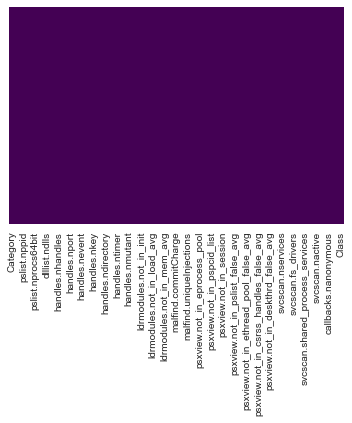

In [24]:
sns.heatmap(mal.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')


Dataset has no missing values.
If there were any, we would've noticed in figure represented by different colour shade on purple background.


                                                                                                                              .

In [25]:
mal.info() #columns data type, counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

#### 2. Dealing with Duplicates

In [26]:
mal.duplicated().sum()  #checking duplicates in a dataframe

534

In [27]:
mal.drop_duplicates(inplace=True)  #Removing 534 duplicated values

In [28]:
mal.shape

(58062, 57)

#### Analysing our target column

In [29]:
mal['Class'].value_counts()

Benign     29231
Malware    28831
Name: Class, dtype: int64

#### Changing the categorical data into numeric using label encoder

In [30]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(mal['Class'])
mal['classN'] = labels
mal.drop(columns='Class')

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,classN
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,0
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,0
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,0
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,0
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,1
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,1
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,1
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,1


In [31]:
mal['classN'].value_counts() #changed to numerical value

0    29231
1    28831
Name: classN, dtype: int64

In [32]:
#encoding category columns also
label_encode = LabelEncoder()
labels = label_encode.fit_transform(mal['Category'])
mal['CategoryN'] = labels
mal.drop(columns='Category')

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,classN,CategoryN
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,Benign,0,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,Benign,0,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,Benign,0,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,Benign,0,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,Benign,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,24,116,0,120,86,0,8,Malware,1,9362
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,24,116,0,116,88,0,8,Malware,1,9282
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,24,116,0,120,88,0,8,Malware,1,9411
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,24,116,0,120,87,0,8,Malware,1,9325


In [33]:
mal['CategoryN'].value_counts() #changed to numerical value

0        29231
17825        2
17787        2
17788        2
17789        2
         ...  
13463        1
13462        1
13461        1
13460        1
9042         1
Name: CategoryN, Length: 28346, dtype: int64

In [34]:
mal.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,classN,CategoryN
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,24,116,0,121,87,0,8,Benign,0,0
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,24,118,0,122,87,0,8,Benign,0,0
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,27,118,0,120,88,0,8,Benign,0,0
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,27,118,0,120,88,0,8,Benign,0,0
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,24,118,0,124,87,0,8,Benign,0,0


<AxesSubplot:xlabel='Class', ylabel='count'>

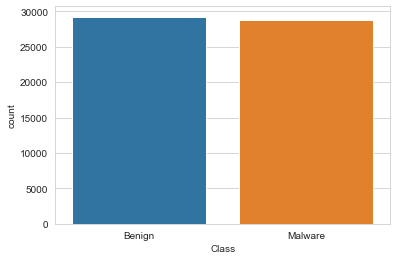

In [35]:
sns.countplot(x='Class', data=mal)


.




#### 3. Outliers detection using boxplot as a whole

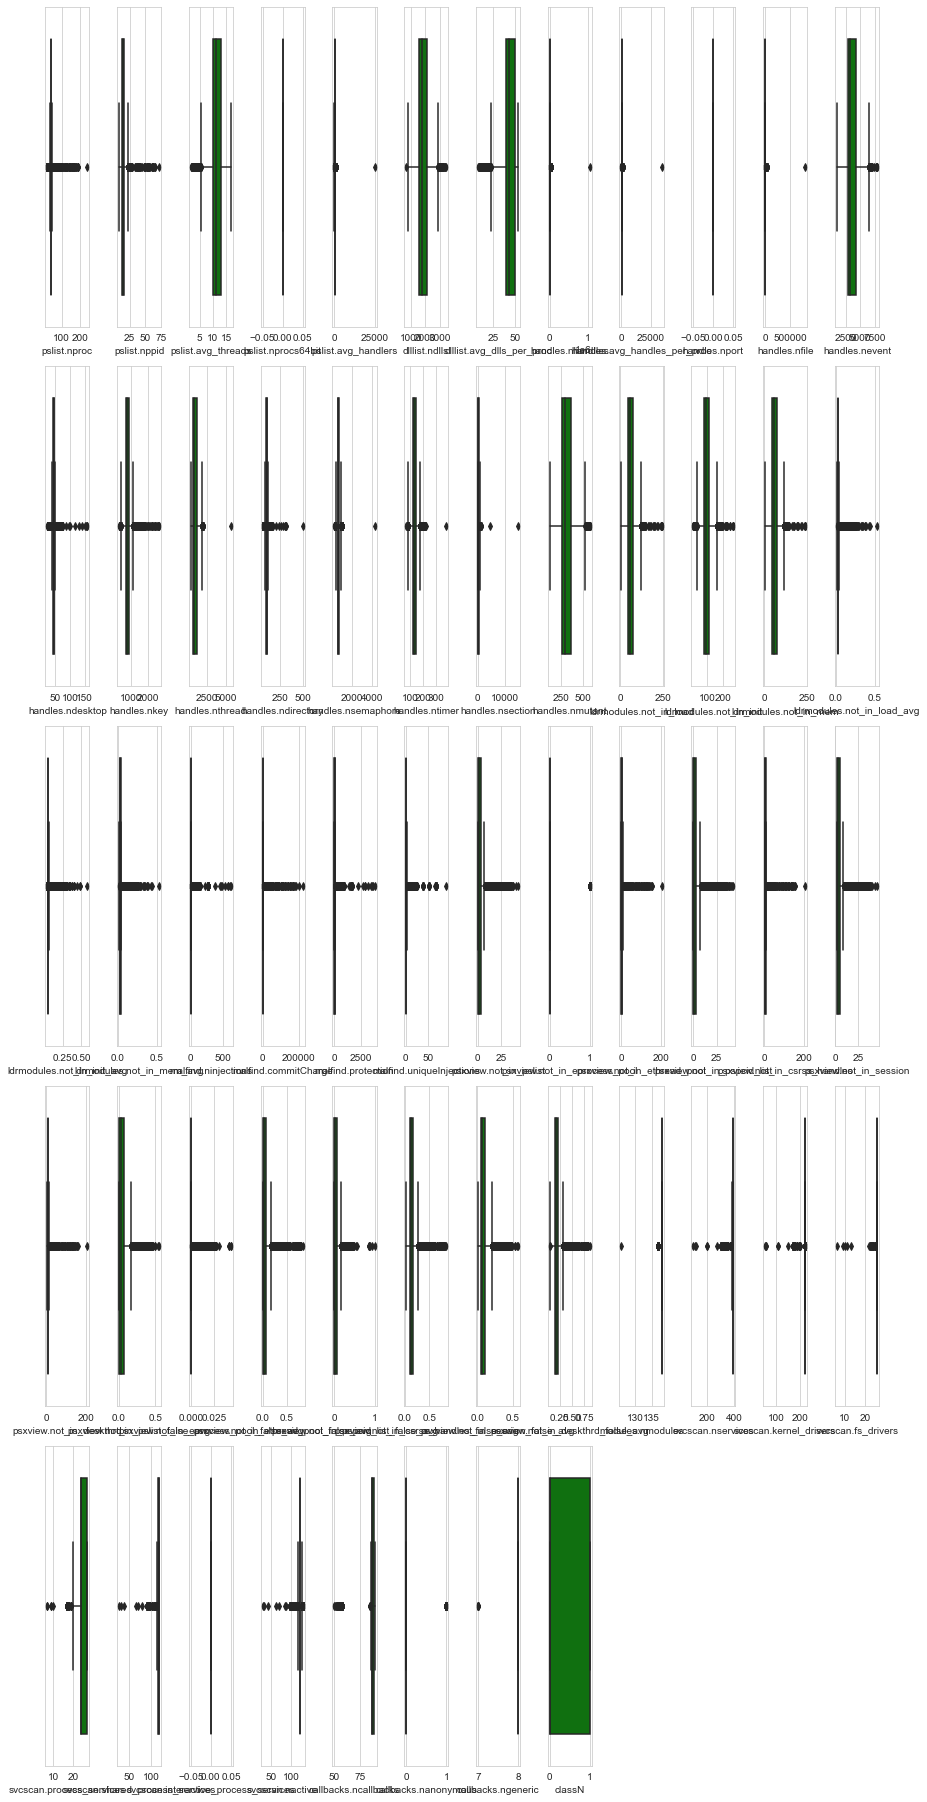

In [65]:
l = mal.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(mal[l[i]],color='green',orient='v')
    plt.tight_layout()

.

Text(0.5, 1.0, 'Outliers Detection')

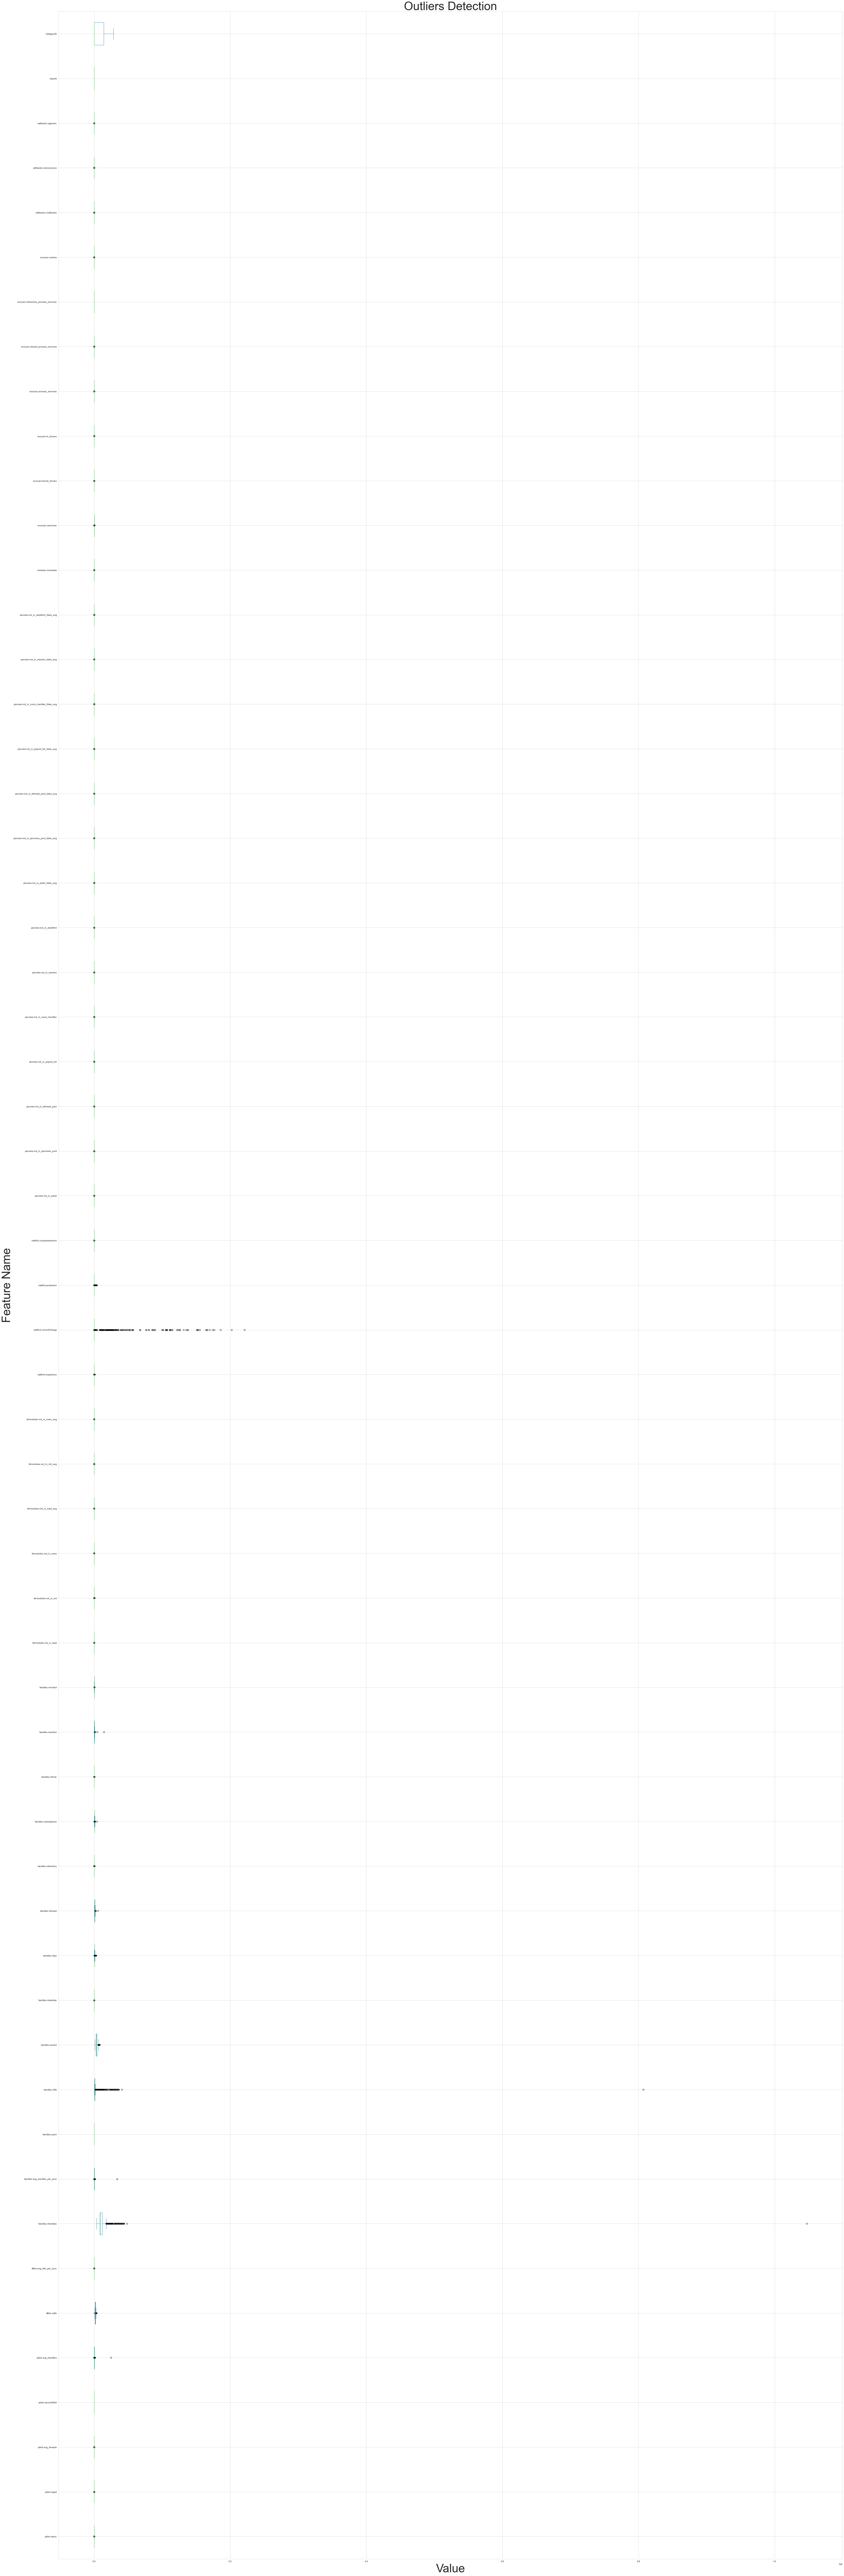

In [37]:
mal.plot(kind='box', figsize=(60,200), vert=False)
plt.xlabel("Value", fontsize= 50)
plt.ylabel("Feature Name", fontsize= 50)
plt.title("Outliers Detection", fontsize= 50)



#### outliers using histo and box on individual features
Taking some of the sample features 

In [38]:
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))   #histogram
    plt.subplot(1,2,1) 
    plt.hist(mal[variable], alpha=0.5)
    
     #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(mal[variable])
    plt.show()

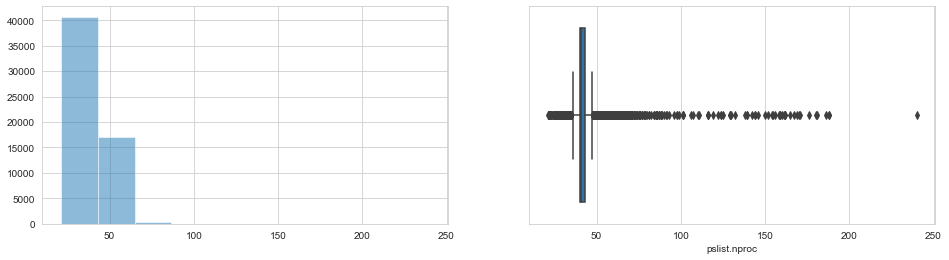

In [39]:
plotvariable(mal, 'pslist.nproc')

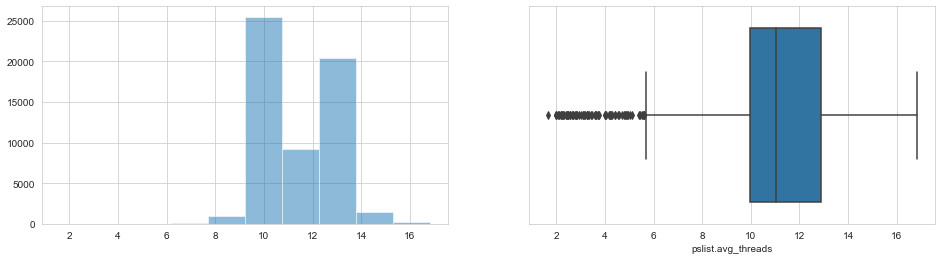

In [40]:
plotvariable(mal,'pslist.avg_threads')


most of the features have outliers

#### Removing Outliers 

In [ ]:
#using Inner Quartile Range
#define a function called outlier which returns a list of indix of outliers
#IQR = Q3-Q1
#+/- 1.5 IQR

def outliers(df, ft):
Q1 = df[ft].quantile(0.25)
Q3 = df[ft].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

ls = df.index[(df[ft] < lower_band) | (df[ft] > upper_band) ]
return ls

#create an empty list to store the output indices from multiple columns
index_list = []
for feature in [df.iloc[:,0:54]]:
    index_list.extend(outliers(mal, feature))
index_list

#define a function called remove which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = mal.drop(ls)
    return df

Text(0.5, 1.0, 'Removed Outliers')

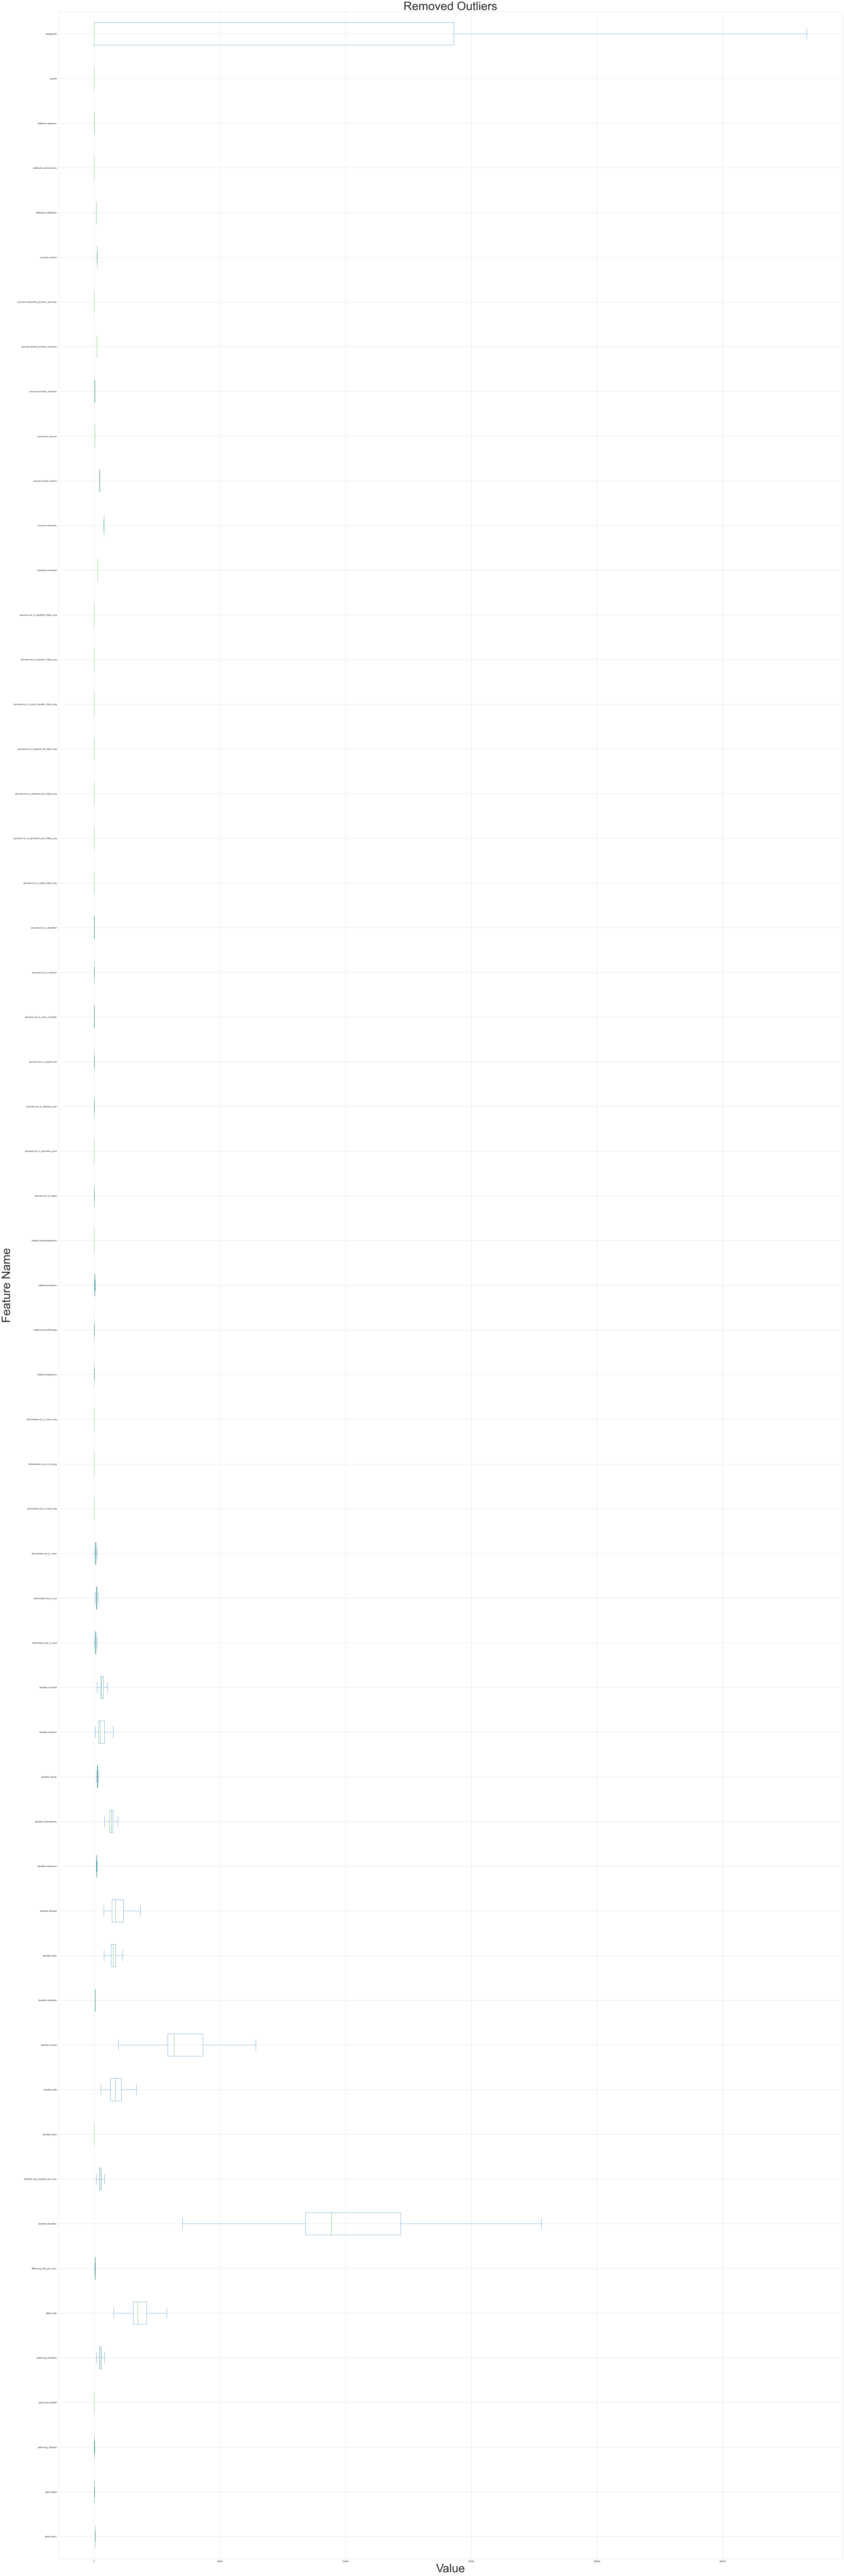

In [41]:
mal.plot(kind='box', figsize=(60,200), vert=False, showfliers=False)
plt.xlabel("Value", fontsize= 50)
plt.ylabel("Feature Name", fontsize= 50)
plt.title("Removed Outliers", fontsize= 50)

In [42]:
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))   #histogram
    plt.subplot(1,2,1) 
    plt.hist(mal[variable], alpha=0.5)
        
     #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(mal[variable], showfliers=False)
    plt.show()

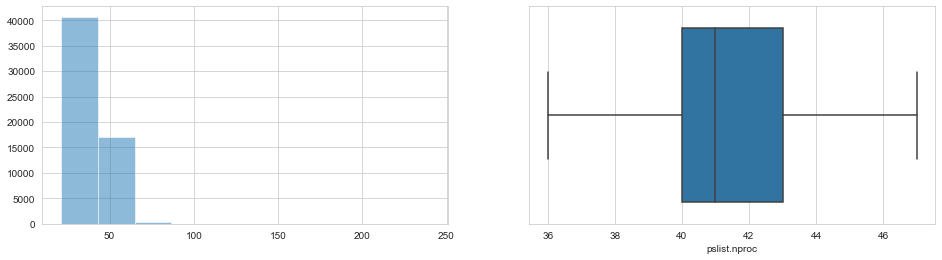

In [43]:
plotvariable(mal, 'pslist.nproc')

In [ ]:
plotvariable(mal,'pslist.avg_threads')




#### 4. Dropping unnecessary columns

In [47]:
mal.drop(columns='Category', axis=1, inplace=True)
mal.shape

(58062, 58)

In [48]:
mal.drop(columns='Class', axis=1, inplace=True)
mal.shape

(58062, 57)

In [63]:
mal.drop(columns='CategoryN', axis=1, inplace=True)
mal.shape

(58062, 56)

In [64]:
mal.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,classN
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0


Now, our dataset is totally cleaned
thus, exporting this clean dataset in CSV format.

In [66]:
mal.to_csv('cleanone.csv')

In [ ]:
#Continuous_cols= mal.iloc[:,0:54]
#Continuous_cols

.




## -------------------Descriptive Analysis--------------------

### Summary Statistics

In [67]:
mal.describe() #statistical view of the dataset

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,classN
count,58062.000000,58062.000000,58062.000000,58062.0,58062.000000,58062.000000,58062.000000,5.806200e+04,58062.000000,58062.0,...,58062.000000,58062.000000,58062.000000,58062.000000,58062.0,58062.000000,58062.000000,58062.000000,58062.000000,58062.000000
mean,41.407547,14.709552,11.350512,0.0,247.802426,1812.960439,43.745115,1.027415e+04,249.853387,0.0,...,221.410079,25.996211,25.071389,116.887448,0.0,122.011453,86.912955,0.000861,7.999879,0.496555
std,5.777920,2.661196,1.587684,0.0,112.285446,329.856293,5.738297,4.884605e+03,146.609930,0.0,...,1.999294,0.171573,1.531002,1.551232,0.0,2.819533,3.115313,0.029333,0.010979,0.499992
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000,0.000000
25%,40.000000,12.000000,9.973684,0.0,208.775000,1556.000000,38.850000,8.402000e+03,209.745640,0.0,...,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000,0.000000
50%,41.000000,15.000000,11.022727,0.0,244.783765,1739.000000,42.977048,9.439500e+03,248.307436,0.0,...,222.000000,26.000000,24.000000,118.000000,0.0,122.000000,87.000000,0.000000,8.000000,0.000000
75%,43.000000,16.000000,12.867817,0.0,290.087324,2088.000000,49.625000,1.219600e+04,291.438689,0.0,...,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000,1.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000,1.000000


Median value is less than mean value of each column represented by 50%(50th percentile) in index column.
Natably large differnece in 75th %tile and max values of predictors "pslist.nproc","pslist.avg_handlers", and many more.   
Thus observations suggests that there are extreme values-Outliers in our dataset

In [50]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58062 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pslist.nproc                            58062 non-null  int64  
 1   pslist.nppid                            58062 non-null  int64  
 2   pslist.avg_threads                      58062 non-null  float64
 3   pslist.nprocs64bit                      58062 non-null  int64  
 4   pslist.avg_handlers                     58062 non-null  float64
 5   dlllist.ndlls                           58062 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58062 non-null  float64
 7   handles.nhandles                        58062 non-null  int64  
 8   handles.avg_handles_per_proc            58062 non-null  float64
 9   handles.nport                           58062 non-null  int64  
 10  handles.nfile                           58062 non-null  in

#### To check distribution-Skewness

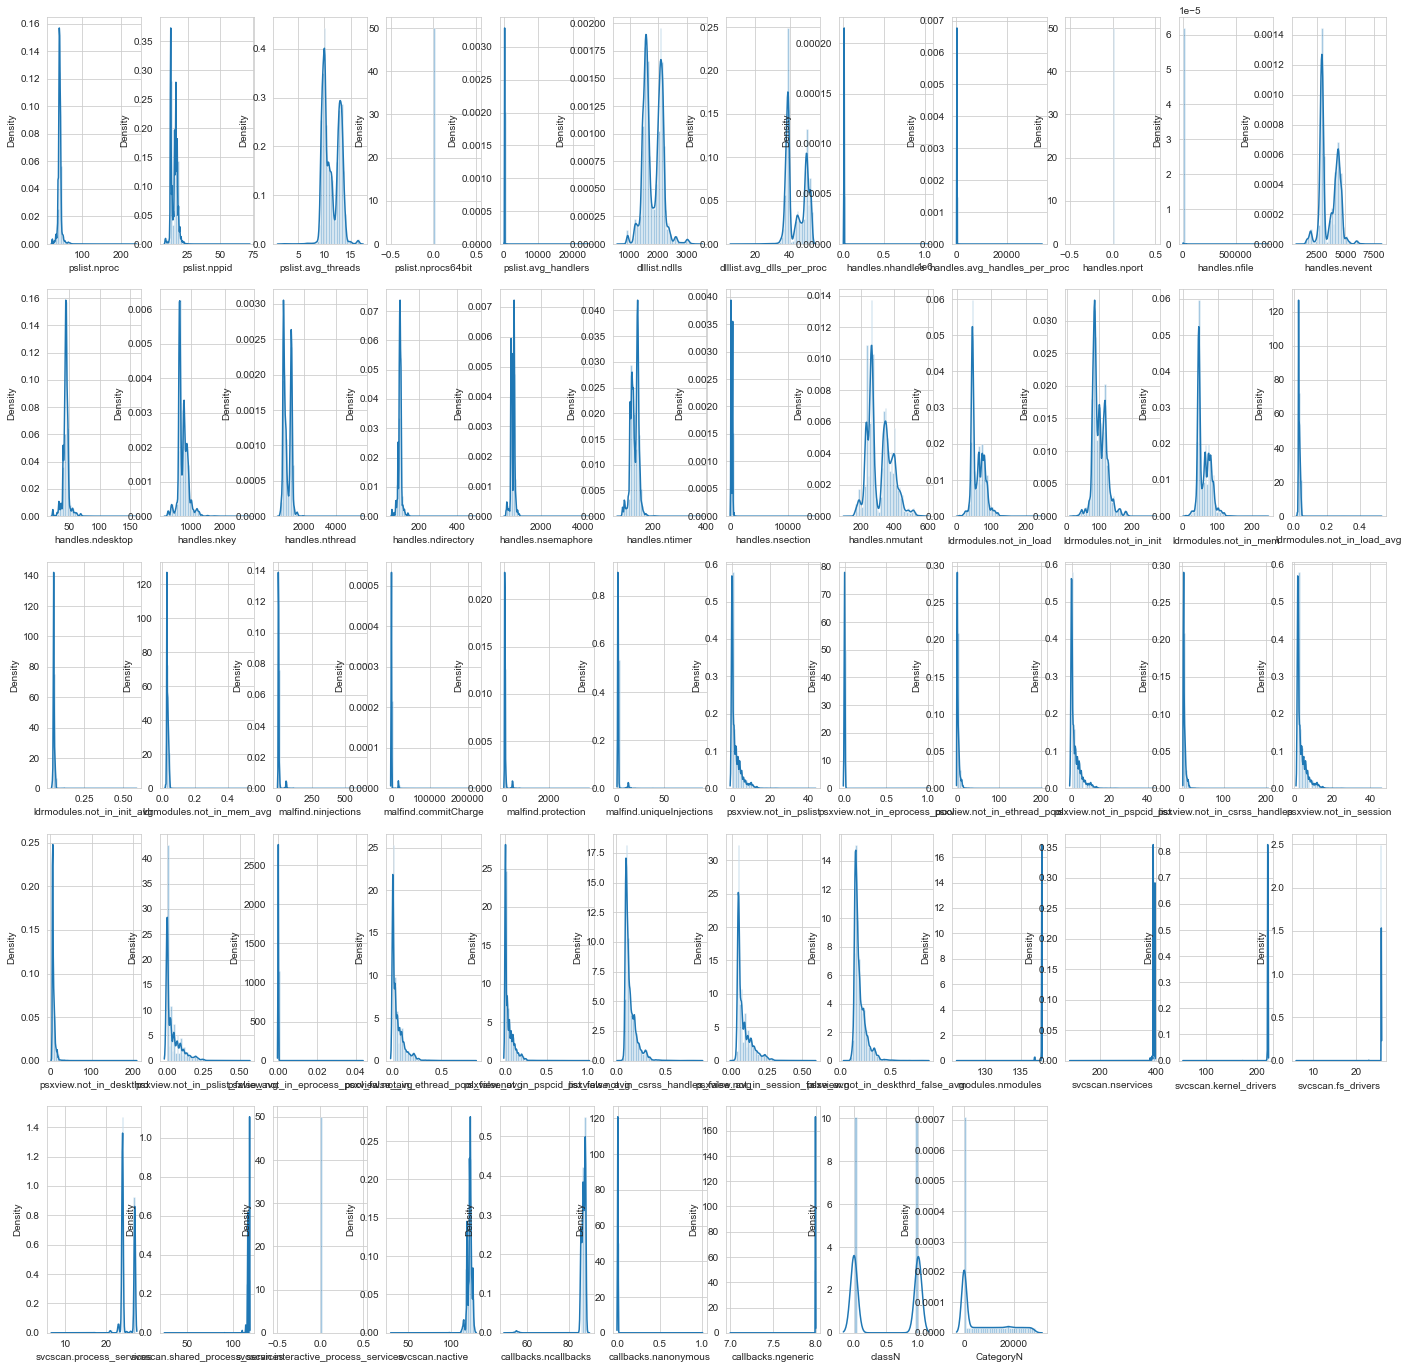

In [56]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(mal[l[i]],kde=True) 

<AxesSubplot:xlabel='handles.nevent', ylabel='Density'>

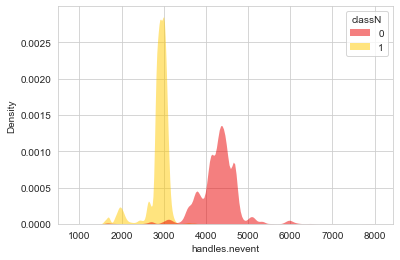

In [140]:
sns.kdeplot(
   data=mal, x="handles.nevent", hue="classN",
   fill=True, common_norm=False, palette="hot",
   alpha=.5, linewidth=0,
)

<AxesSubplot:xlabel='handles.nhandles', ylabel='Density'>

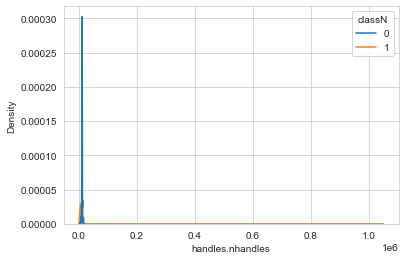

In [143]:
sns.kdeplot(data=mal, x="handles.nhandles", hue="classN")

<AxesSubplot:xlabel='classN', ylabel='handles.nsection'>

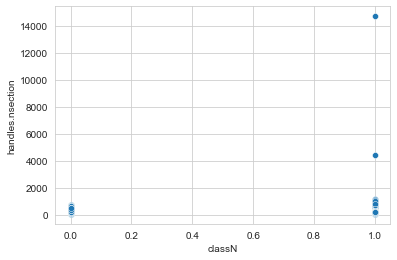

In [144]:
sns.scatterplot(data=mal, y="handles.nsection", x="classN")


.




## --------------------Diagnostic Analysis-------------------------


### Correlation Plots

<AxesSubplot:>

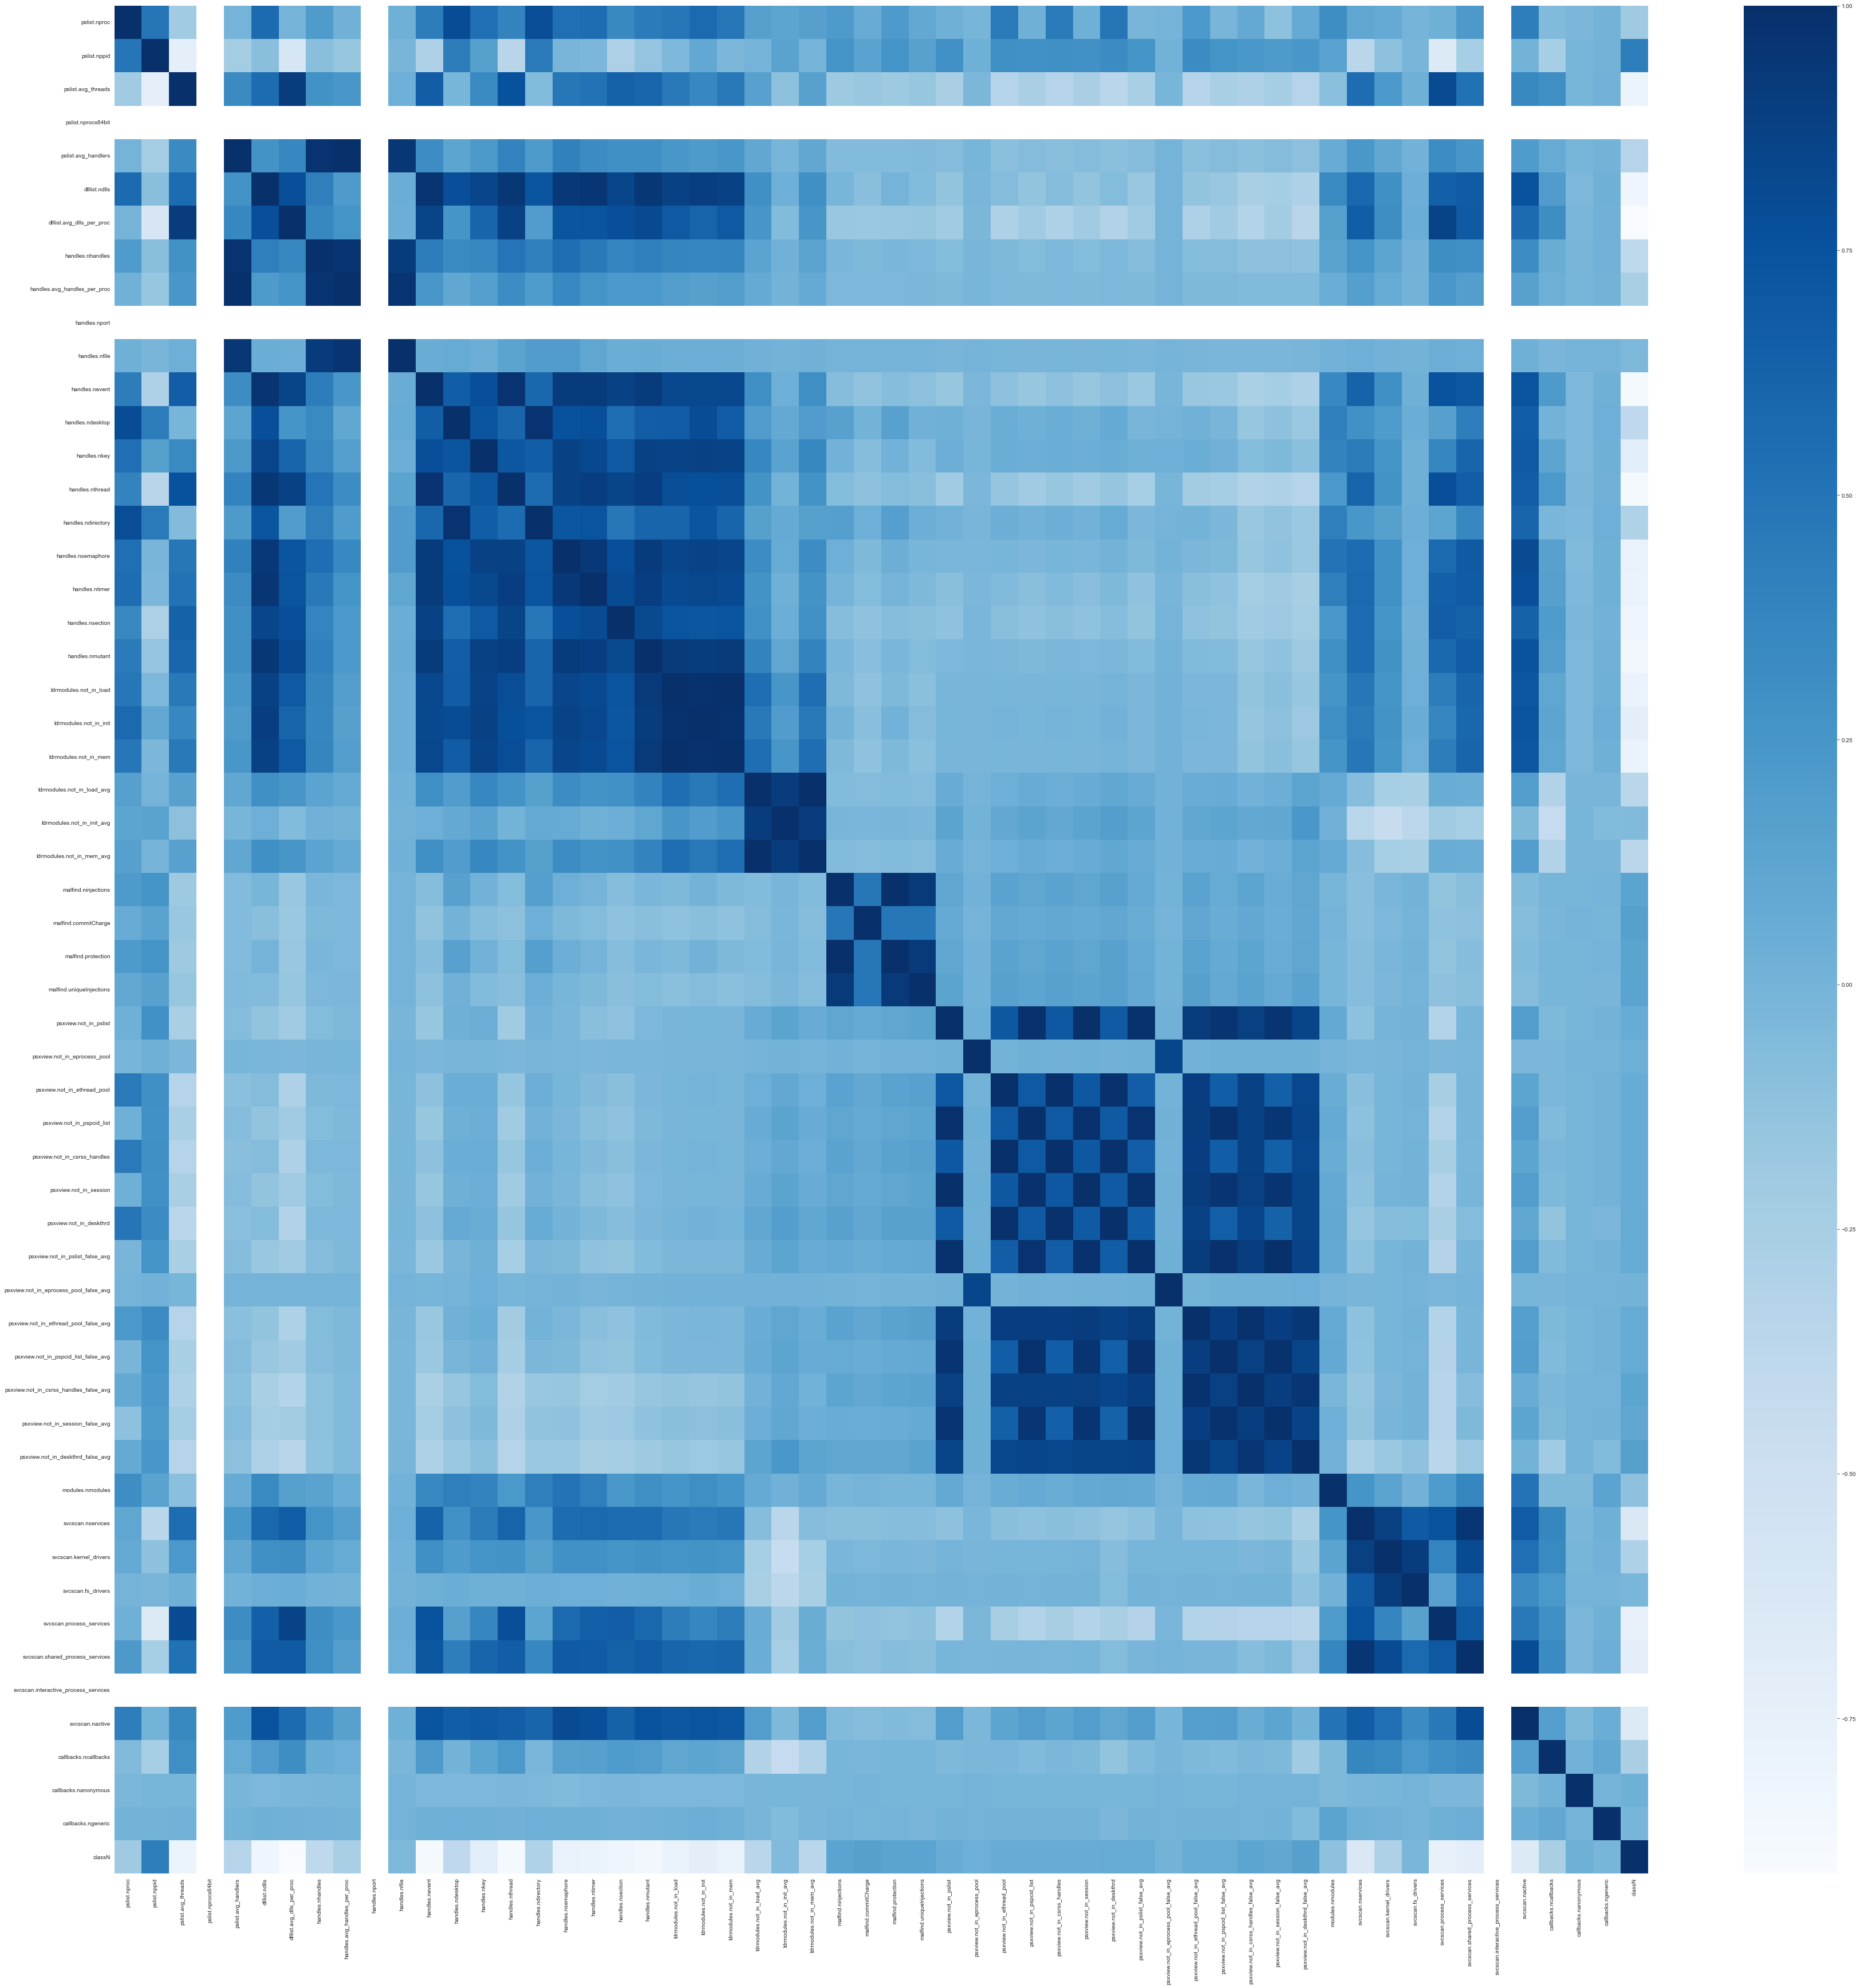

In [147]:
plt.figure(figsize=(60,60))
sns.heatmap(mal.corr(),cmap='Blues',annot=False) 

Dark shades represents positive correlation while lighter shades represents negative correlation.
If we set annot=True, we'll get values by which features are correlated to each other in grid-cells

<AxesSubplot:>

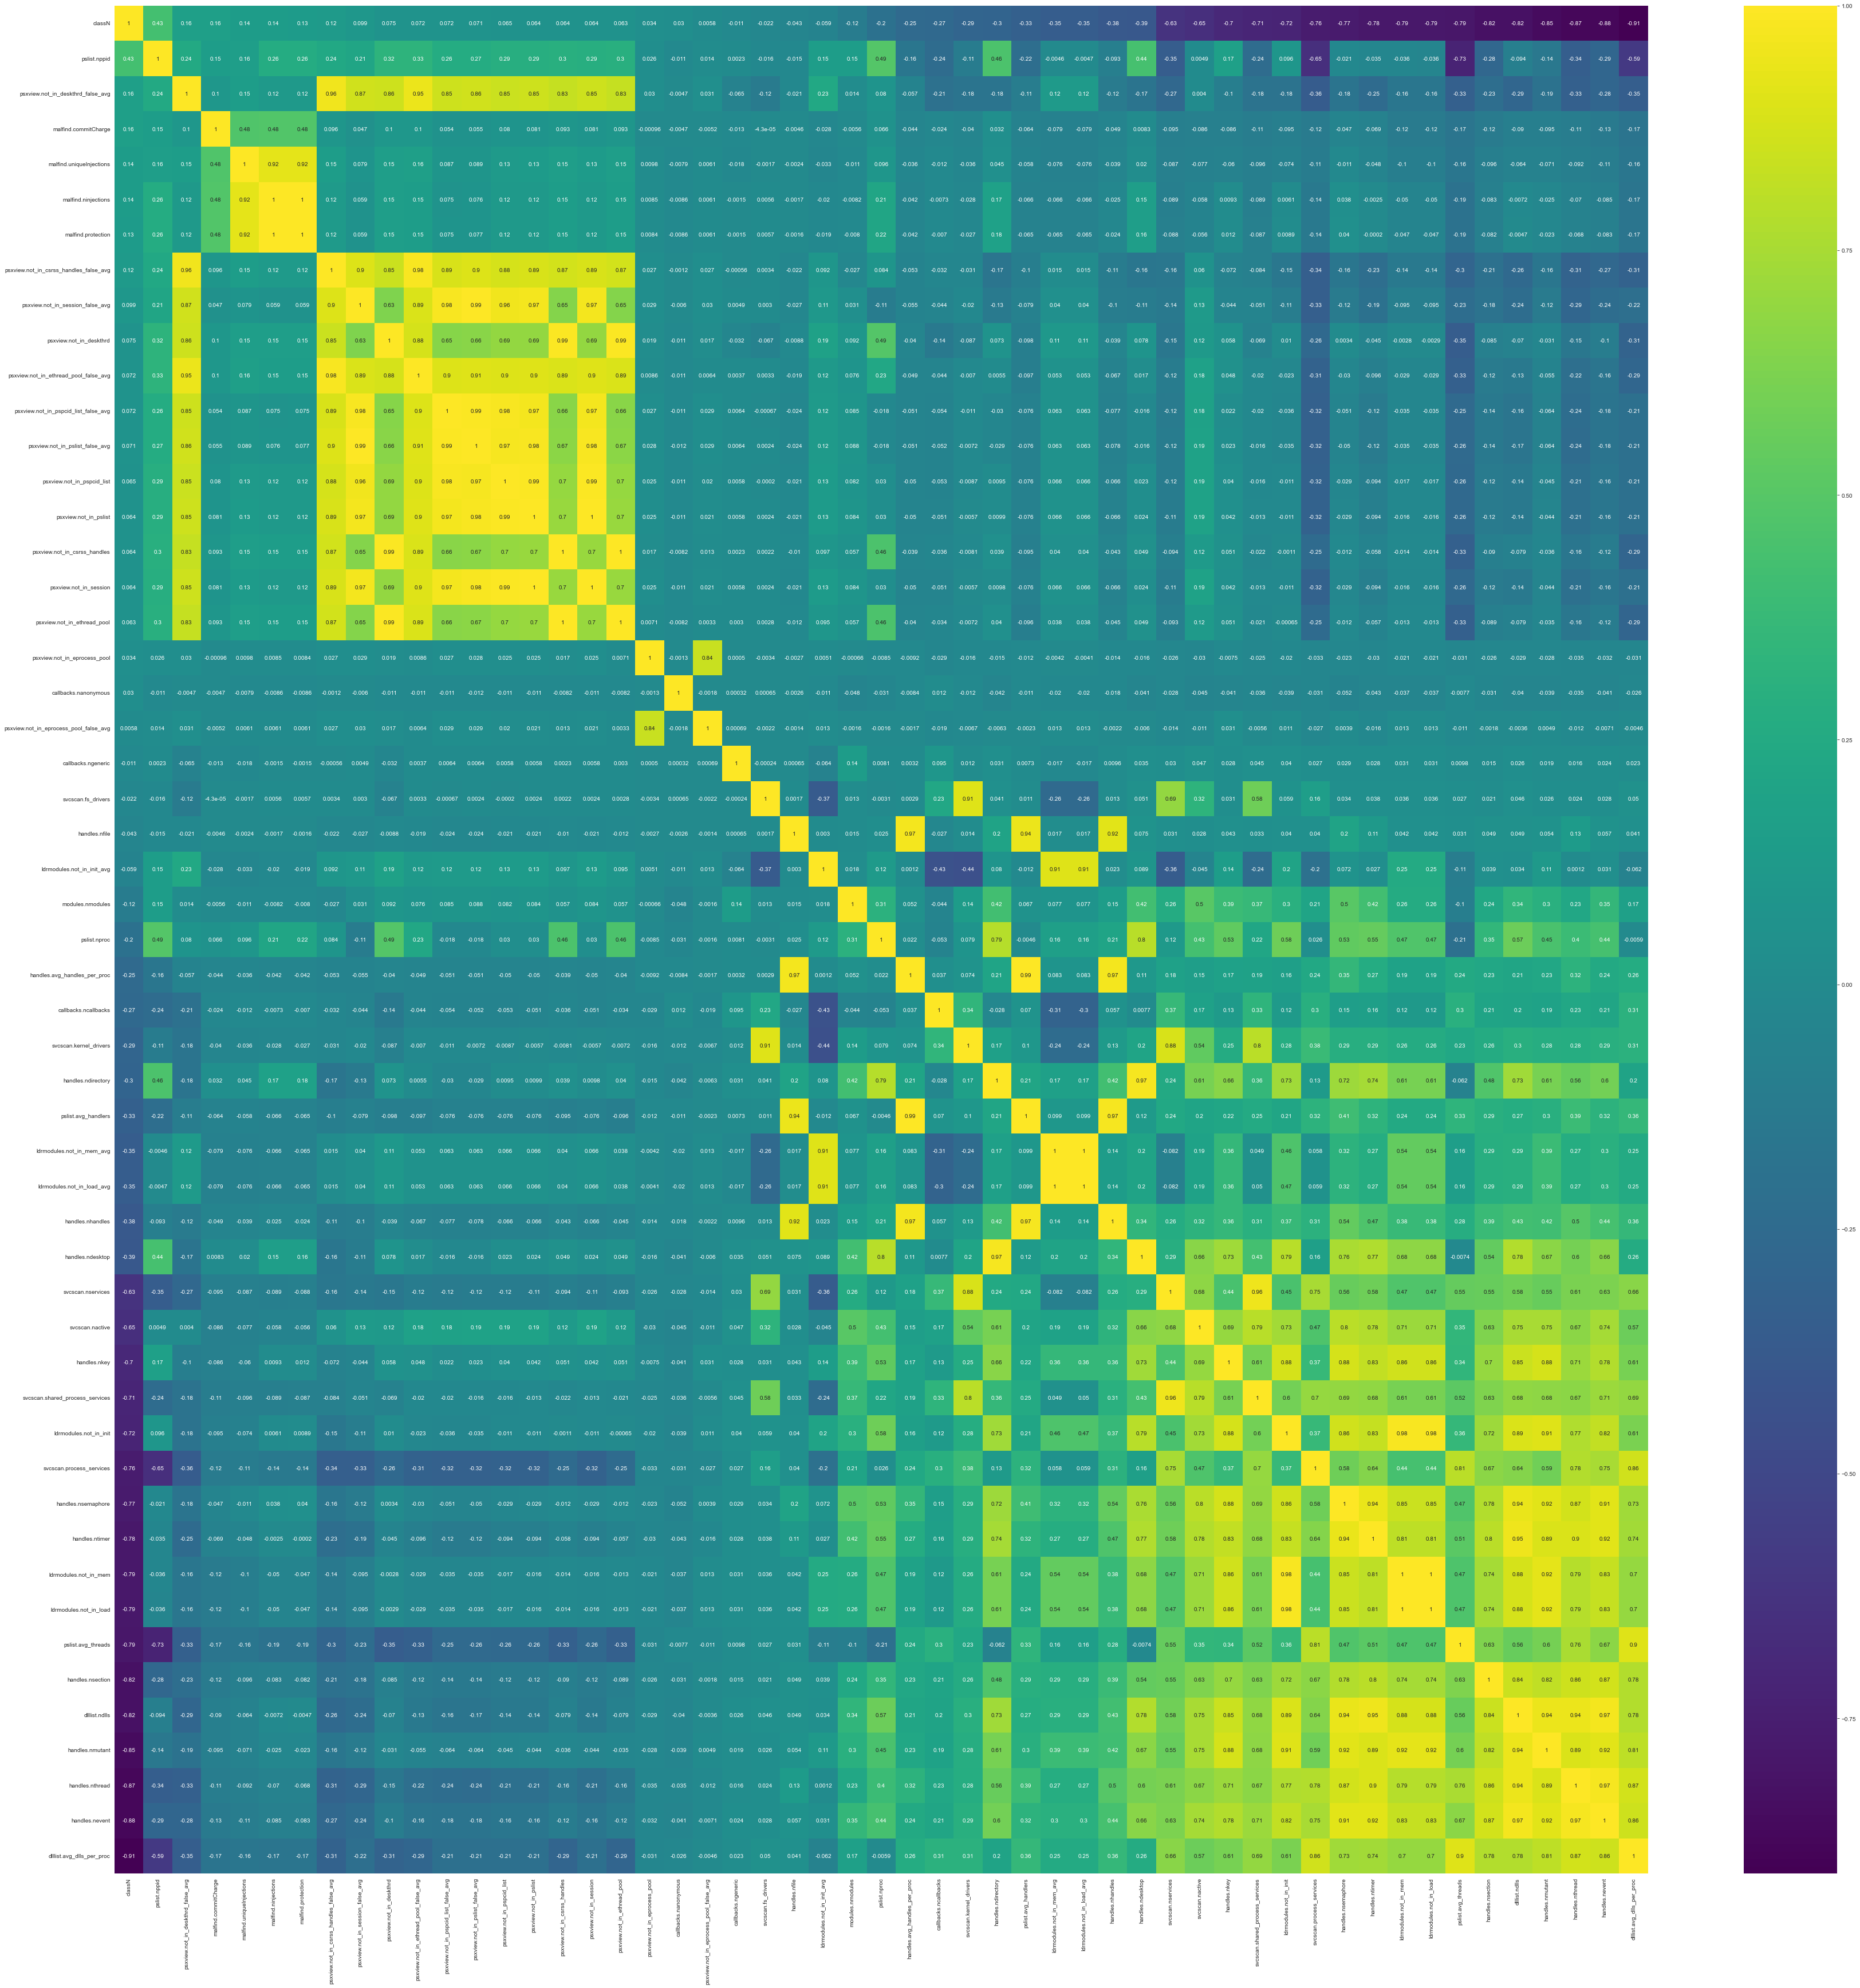

In [146]:
#Quality correlation matrix
k = 56 #number of features for heatmap
cols = mal.corr().nlargest(k, 'classN')['classN'].index
cm = mal[cols].corr()
plt.figure(figsize=(60,60))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Here we can infer that "dlllist.avg_dlls_per_proc" has strong positive correlation with "Class".


.



## -----------------Predictive Analysis------------------------



### Selecting top 5 features

### Chi Square Test 

In [115]:
X = mal.iloc[:,0:54]  #independent columns
y = mal.iloc[:,55]    #target column i.e classnum(where benign=1, malware=0) range

In [116]:
bestfeatures = SelectKBest(score_func=chi2, k=5)  #SelectKBest
fit = bestfeatures.fit(X,y)

In [117]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#### concat two dataframes for better visualization 


In [118]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FeatureName','Score']  #naming the dataframe columns
featureScores

,FeatureName,Score
0,pslist.nproc,1.836924e+03
1,pslist.nppid,5.150413e+03
2,pslist.avg_threads,8.064996e+03
3,pslist.nprocs64bit,NaN
4,pslist.avg_handlers,3.265868e+05
5,dlllist.ndlls,2.361919e+06
6,dlllist.avg_dlls_per_proc,3.609232e+04
7,handles.nhandles,1.952208e+07
8,handles.avg_handles_per_proc,3.212857e+05
9,handles.nport,NaN


#### Listing best 5 features on the basis of score rate

In [119]:
print(featureScores.nlargest(5,'Score'))  #print 5 best features


             FeatureName         Score
27  malfind.commitCharge  5.631996e+07
7       handles.nhandles  1.952208e+07
11        handles.nevent  8.087059e+06
18      handles.nsection  2.797285e+06
14       handles.nthread  2.685897e+06


In [120]:
topFeatures=(featureScores.nlargest(5, 'Score'))
topFeatures.head()

,FeatureName,Score
27,malfind.commitCharge,5.631996e+07
7,handles.nhandles,1.952208e+07
11,handles.nevent,8.087059e+06
18,handles.nsection,2.797285e+06
14,handles.nthread,2.685897e+06



.


## Feature Importance


In [122]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [123]:
print(model.feature_importances_) 


[1.97879654e-03 2.01379699e-02 5.43892288e-02 0.00000000e+00
 6.76922099e-03 4.38958782e-02 9.31700411e-02 1.35059639e-02
 9.42506532e-03 0.00000000e+00 5.71858725e-03 5.83989045e-02
 3.07232855e-03 2.47170293e-02 4.29398622e-02 3.00859204e-03
 1.39960237e-02 1.04645860e-02 1.14398617e-02 9.84901032e-02
 7.34866507e-02 4.61082588e-02 5.03653536e-02 1.16106986e-02
 4.25506394e-03 1.56075350e-02 2.13638773e-03 1.45242105e-03
 3.66123270e-03 3.62619391e-03 3.78988470e-03 5.06109237e-05
 7.03665141e-04 1.51244905e-03 1.96826471e-03 3.91097791e-03
 1.12876367e-03 5.09823895e-03 4.84584180e-05 3.77077952e-03
 1.48055867e-03 5.02041600e-03 2.93073631e-03 2.68002671e-03
 1.31421943e-03 3.74387600e-02 2.00368901e-02 9.78811528e-06
 5.80938625e-02 8.87585715e-02 0.00000000e+00 2.19283674e-02
 1.04787726e-02 1.90984924e-05]


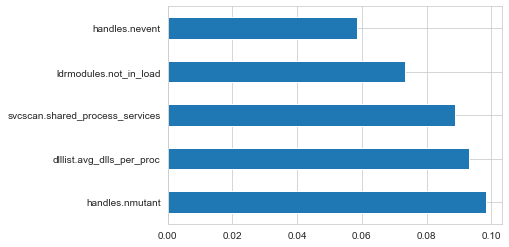

In [124]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

.



## Decision Tree Classifier

In [126]:
X = mal.values[:,0:54]
Y = mal.values[:,55]  #separating target variable


In [127]:
#Split 70% data for training and 30% testing. 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state = 100)

In [128]:
#training dataset
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=100)
clf.fit(X_train, y_train)
print("Decision Tree Model Trained") 

Decision Tree Model Trained


In [129]:
#function to make predictions
y_pred_en = clf.predict(X_test)
print(y_pred_en)

[0. 0. 1. ... 1. 1. 1.]


In [138]:
y_pred_en = clf.predict(X_test)
pred_dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_en})
pred_dfs.head()

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


### Confusion matrics

Results on the test set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8726
         1.0       1.00      1.00      1.00      8693

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



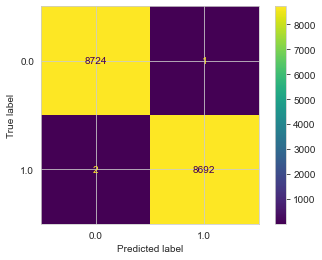

In [135]:
#we can get the confusion matrix
CM = confusion_matrix(y_test, y_pred_en)
#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

print('Results on the test set:')
print(classification_report(y_pred_en, y_test))

In [136]:
accuracy_score(y_test,y_pred_en)

0.9998277742694759

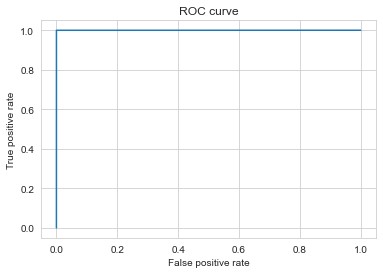

AUC of the predictions: 99.98277742694759 %


In [137]:
# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_en, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
# Measure the area under the curve. The closer to 1, the "better" the predictions.
print("AUC of the predictions:",accuracy_score(y_test,y_pred_en)*100,'%')